In [57]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
df = pd.read_csv('../../Datos/Datos_Modelo_2/Modelo_2_CL_1.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
0,2309.650,46.172483,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,184.445340,174.465855,184.445340,407.007157,221.426711,236.832549,423.387426
1,3709.395,45.676969,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,274.724060,267.181113,280.593182,367.199271,383.072951,236.041255,415.484072
2,2832.960,44.650548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,214.579374,158.005654,158.005654,405.224457,598.559032,236.041255,415.484072
3,5244.840,43.421236,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,211.980722,273.730793,280.744864,377.454090,773.983634,237.730376,417.645869
4,4164.050,41.833998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,185.534136,217.497839,185.534136,110.932251,92.074377,237.847531,175.389119


In [59]:
df.describe()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
count,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000
mean,216.727980,0.810270,0.143573,0.052208,0.204798,0.599421,0.508609,0.299808,0.191583,0.075123,0.304560,0.044234,0.576083,216.371288,216.710761,216.709818,216.697283,216.460347,216.724232,216.648014
std,380.166476,2.494847,0.350662,0.222451,0.403560,0.490024,0.499934,0.458181,0.393553,0.263594,0.460228,0.205618,0.494186,66.436405,46.334592,50.376572,136.762712,193.213316,44.220964,96.907821
min,0.556000,-0.366401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.428000,133.065137,133.065137,106.969417,28.022785,59.263312,173.447695
25%,29.785000,-0.242273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.037474,186.030078,184.445340,109.881975,66.999106,236.041255,173.895136
50%,80.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,209.434842,226.866141,200.805070,110.932251,115.580861,236.322109,174.222753
75%,232.366500,0.757727,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,274.252041,242.926658,270.007665,377.454090,390.712431,237.730376,177.048446
max,7958.580000,46.172483,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1180.440000,325.200094,282.123265,408.343208,773.983634,237.847531,641.501912


In [60]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [61]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [63]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [64]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 49.61852306],
       [-44.25043441],
       [ 70.94964149]])

In [65]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[124.45659087],
       [ 19.7683853 ],
       [433.89049843]])

In [66]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [67]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.740793,98.707672,37308.769424,193.154781
test,0.699944,99.972929,43776.019448,209.227196


Text(0, 0.5, 'Predicciones (y_test_pred)')

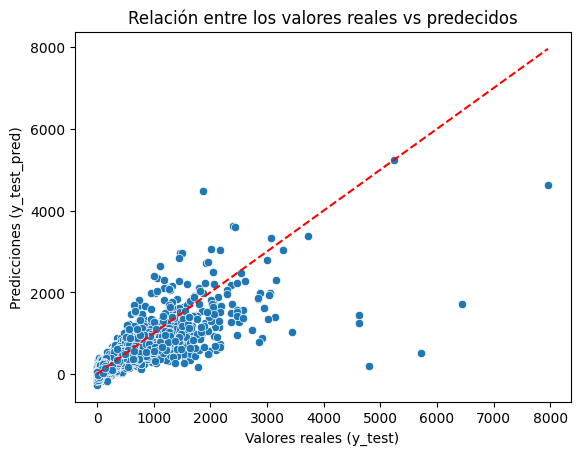

In [68]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [69]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [70]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [71]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [72]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [73]:
params_arbol_5 = {
    'max_depth': [5,7],
    'min_samples_split': [7,9,10],
    'min_samples_leaf': [15,17],
    'max_leaf_nodes': [30,32,38]
}

In [74]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_leaf_nodes': [30, 32, 38],
                         'min_samples_leaf': [15, 17],
                         'min_samples_split': [7, 9, 10]},
             scoring='neg_mean_squared_error')

In [75]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [76]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=38, min_samples_leaf=17,
                      min_samples_split=7)

In [77]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [78]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [79]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.845809,71.076964,22193.311896,148.974199
test,0.761163,75.356768,34844.666609,186.667262


Maybe un poco de overfitting, nada grave

In [80]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,0.308915,0.051152,0.006504,0.002279,7,38,17,10,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-30727.267657,-28570.415320,-23671.928644,-26211.385482,-20490.135638,-25934.226548,3598.768374,1
34,0.358781,0.044164,0.033335,0.034560,7,38,17,9,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-30727.267657,-28570.415320,-23671.928644,-26211.385482,-20490.135638,-25934.226548,3598.768374,1
33,0.328722,0.042175,0.042087,0.044655,7,38,17,7,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-30727.267657,-28570.415320,-23671.928644,-26211.385482,-20490.135638,-25934.226548,3598.768374,1
32,0.324960,0.050951,0.045043,0.048283,7,38,15,10,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-32132.784698,-28266.403404,-23671.928644,-26041.213660,-20484.804491,-26119.426979,3962.709044,4
31,0.334127,0.041014,0.022259,0.031562,7,38,15,9,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-32132.784698,-28266.403404,-23671.928644,-26041.213660,-20484.804491,-26119.426979,3962.709044,4
30,0.351624,0.006892,0.006600,0.002246,7,38,15,7,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-32132.784698,-28266.403404,-23671.928644,-26041.213660,-20484.804491,-26119.426979,3962.709044,4
29,0.313479,0.048715,0.037070,0.038059,7,32,17,10,"{'max_depth': 7, 'max_leaf_nodes': 32, 'min_sa...",-31069.724937,-29521.916127,-23616.542670,-27052.198301,-20989.441196,-26449.964646,3714.494659,7
28,0.352493,0.038566,0.027834,0.040245,7,32,17,9,"{'max_depth': 7, 'max_leaf_nodes': 32, 'min_sa...",-31069.724937,-29521.916127,-23616.542670,-27052.198301,-20989.441196,-26449.964646,3714.494659,7
27,0.348609,0.008091,0.007430,0.002132,7,32,17,7,"{'max_depth': 7, 'max_leaf_nodes': 32, 'min_sa...",-31069.724937,-29521.916127,-23616.542670,-27052.198301,-20989.441196,-26449.964646,3714.494659,7
25,0.325513,0.045364,0.038793,0.039862,7,32,15,9,"{'max_depth': 7, 'max_leaf_nodes': 32, 'min_sa...",-32475.241978,-29235.080375,-23616.542670,-27052.198301,-20984.110050,-26672.634674,4051.652966,10


In [81]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
35,7,38,17,10,-25934.226548
34,7,38,17,9,-25934.226548
33,7,38,17,7,-25934.226548
32,7,38,15,10,-26119.426979
31,7,38,15,9,-26119.426979
30,7,38,15,7,-26119.426979
29,7,32,17,10,-26449.964646
28,7,32,17,9,-26449.964646
27,7,32,17,7,-26449.964646
25,7,32,15,9,-26672.634674


In [82]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [83]:
df_rmse_prof

,param_max_depth,MSE
0,5,167.657779
1,7,162.805167


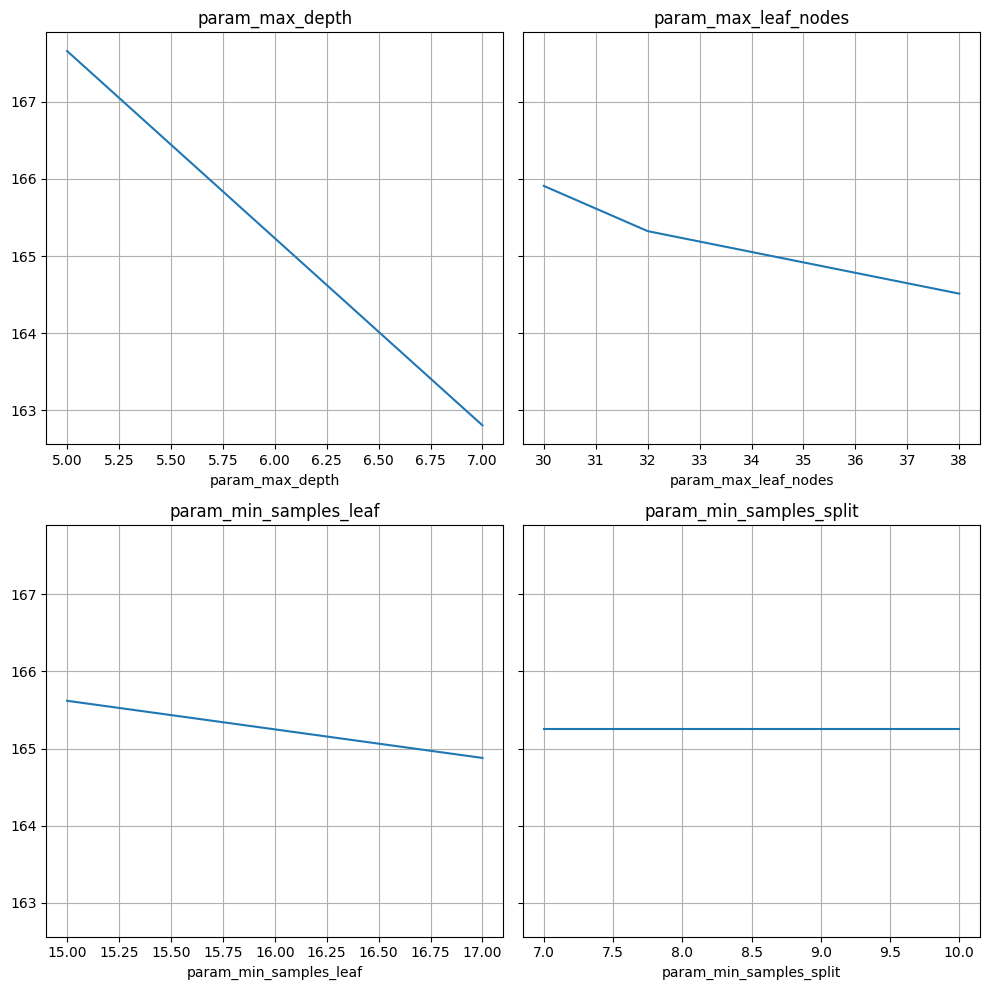

In [84]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [85]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

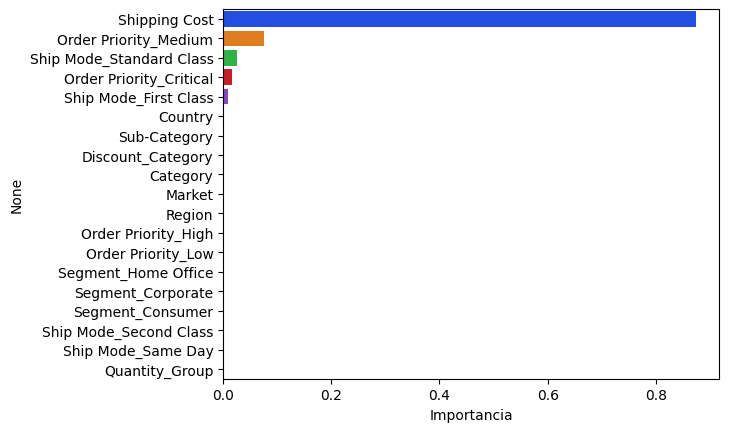

In [86]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [87]:
params_rrf = {
    'n_estimators': [250,300],
    'max_features': [4,8,9],
    'max_depth': [5,6,7],
    'min_samples_split': [7,9,10],
    'min_samples_leaf': [12,15,20], 
    'max_leaf_nodes': [30,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [88]:
modelo_final_rrf

RandomForestRegressor(max_depth=7, max_features=9, max_leaf_nodes=55,
                      min_samples_leaf=12, min_samples_split=10,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [89]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.860773,65.432795,20039.558879,141.561149
test,0.780135,70.135744,32076.809395,179.099998


### Random Distinto

In [ ]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [5,7,9],
    'max_depth': [5,7,9],
    'min_samples_split': [7,9,10],
    'min_samples_leaf': [10,12,20,21], 
    'max_leaf_nodes': [45,55]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=15, max_leaf_nodes=50,
                      min_samples_leaf=19, min_samples_split=28,
                      n_estimators=300, random_state=42)

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.829747,87.422319,53714.040965,231.762898
test,0.842475,85.596408,43471.579256,208.498391


## Gradient Booster

In [ ]:
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [7,9,10],
    'min_samples_leaf': [12,15,20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [ ]:
modelo_final_gb

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=20,
                          min_samples_split=100, n_estimators=115,
                          random_state=42)

In [ ]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.861282,82.884382,43764.700669,209.200145
test,0.859297,81.370597,38829.434627,197.051858


## XGB

In [ ]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [ ]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.765056,121.092807,74123.669826,272.256625
test,0.782358,116.982186,60062.045790,245.075592
